In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [3]:
# Import files
all_merged = pd.read_csv('../../Barnett_Natalie_studentC/Data/C_all_merged.csv', encoding='utf-8')
genres = pd.read_csv('../../Barnett_Natalie_studentC/Data/C_genres_stage3.csv', encoding='utf-8')
genre_ids = pd.read_csv('../../Barnett_Natalie_studentC/Data/C_genre_ids_stage3.csv', encoding='utf-8')
production_companies = pd.read_csv('../../Barnett_Natalie_studentC/Data/C_production_companies_stage3.csv', encoding='utf-8')
company_ids = pd.read_csv('../../Barnett_Natalie_studentC/Data/C_company_ids_stage3.csv', encoding='utf-8')
oscars_movies_merged = pd.read_csv('../../Barnett_Natalie_studentC/Data/C_oscars_movies_merged.csv', encoding='utf-8')

In [4]:
# Merge all datasets together 
merge1 = all_merged.merge(genres, left_on='movie_id', right_on='movie_id', how='left', validate='one_to_many')
merge2 = merge1.merge(genre_ids, left_on= 'genre_id', right_on= 'genre_id', how='left', validate='many_to_one')
merge3 = merge2.merge(production_companies, left_on='movie_id', right_on='movie_id', validate='many_to_many')
merge4 = merge3.merge(company_ids, left_on='production_company_id', right_on='production_company_id', validate='many_to_many')
all_files = merge4.merge(oscars_movies_merged, left_on='movie_id', right_on='movie_id', validate='many_to_many')
all_files

,movie_id,title,budget_rank,budget,revenue_rank,revenue,revenue_budget_ratio,profit_rank,profit,release_date,...,oscars_held,category,name,film_title,character_name,honorary_statement,description,note,act_dir,winner_type
0,585,"Monsters, Inc.",339.0,115000000.0,169.0,579707738.0,5.04,169.0,464707738.0,2001-11-01,...,74.0,MUSIC (Original Song),Music and Lyric by Randy Newman,"Monsters, Inc.",NaN,NaN,NaN,NaN,False,Single Winner
1,585,"Monsters, Inc.",339.0,115000000.0,169.0,579707738.0,5.04,169.0,464707738.0,2001-11-01,...,74.0,MUSIC (Original Song),Music and Lyric by Randy Newman,"Monsters, Inc.",NaN,NaN,NaN,NaN,False,Single Winner
2,585,"Monsters, Inc.",339.0,115000000.0,169.0,579707738.0,5.04,169.0,464707738.0,2001-11-01,...,74.0,MUSIC (Original Song),Music and Lyric by Randy Newman,"Monsters, Inc.",NaN,NaN,NaN,NaN,False,Single Winner
3,585,"Monsters, Inc.",339.0,115000000.0,169.0,579707738.0,5.04,169.0,464707738.0,2001-11-01,...,74.0,MUSIC (Original Song),Music and Lyric by Randy Newman,"Monsters, Inc.",NaN,NaN,NaN,NaN,False,Single Winner
4,585,"Monsters, Inc.",339.0,115000000.0,169.0,579707738.0,5.04,169.0,464707738.0,2001-11-01,...,74.0,MUSIC (Original Song),Music and Lyric by Randy Newman,"Monsters, Inc.",NaN,NaN,NaN,NaN,False,Single Winner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12045,71266,Cleopatra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912-11-13,...,36.0,CINEMATOGRAPHY (Color),Leon Shamroy,Cleopatra,NaN,NaN,NaN,NaN,False,Single Winner
12046,71266,Cleopatra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912-11-13,...,36.0,COSTUME DESIGN (Color),"Irene Sharaff, Vittorio Nino Novarese, Renie",Cleopatra,NaN,NaN,NaN,NaN,False,Single Winner
12047,71266,Cleopatra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912-11-13,...,36.0,SPECIAL EFFECTS,"Emil Kosa, Jr.",Cleopatra,NaN,NaN,NaN,NaN,False,Single Winner
12048,52779,Glass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1958-01-01,...,32.0,DOCUMENTARY (Short Subject),"Bert Haanstra, Producer",Glass,NaN,NaN,NaN,NaN,False,Single Winner


## Answer Project Questions

### 1. Which genre(s) wins the most Academy awards and/or generates the most revenue?

### 2. Which month(s) brings the greatest number of new movie releases? Is there a relationship between genre and release month (i.e are more movies released in the summer)?

### 3. Is there correlation between a movie’s production budget and award wins? If not, what other factors, such as release timing, the movie director, etc. contribute to award recognition?

In [5]:
# 1. Which genre(s) wins the most Academy awards and/or generates the most revenue?
# Identify the relevant columns and perform data aggregation and analysis
awards_by_genre = all_files.groupby(['genre_name'])['oscar_total'].sum()
revenue_by_genre = all_files.groupby(['genre_name'])['revenue'].sum()

In [6]:
# Identify the max values of each
most_awards_genre = awards_by_genre.idxmax()
highest_revenue_genre = revenue_by_genre.idxmax()
# Present the results
print(f"The genre with the most Academy Awards: {most_awards_genre}")
print(f"The genre with the highest revenue: {highest_revenue_genre}")

The genre with the most Academy Awards: Drama
The genre with the highest revenue: Drama


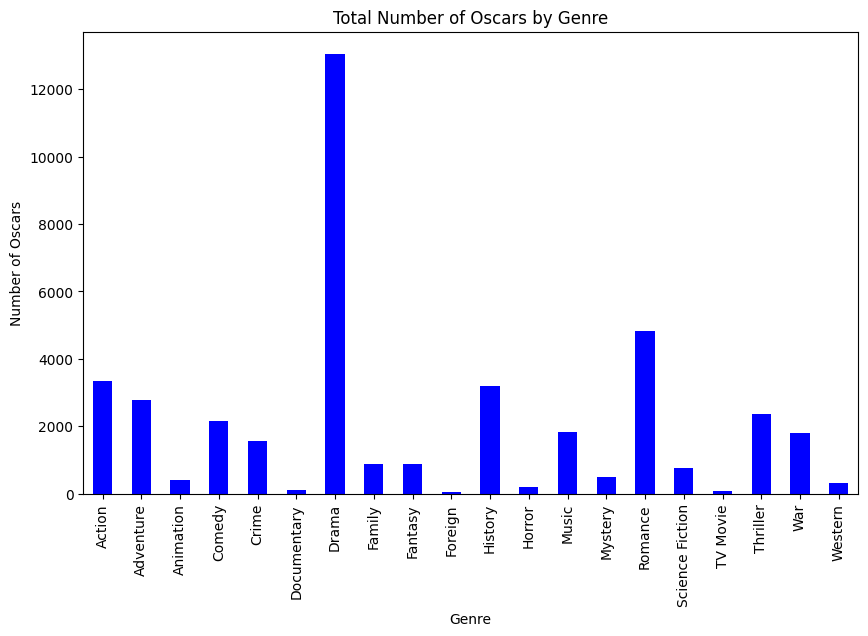

In [7]:
# Visualize the results for Number of Oscars by Genre
plt.figure(figsize=(10, 6))
awards_by_genre.plot(kind="bar", color="blue")
plt.xlabel("Genre")
plt.ylabel("Number of Oscars")
plt.title("Total Number of Oscars by Genre")
plt.show()

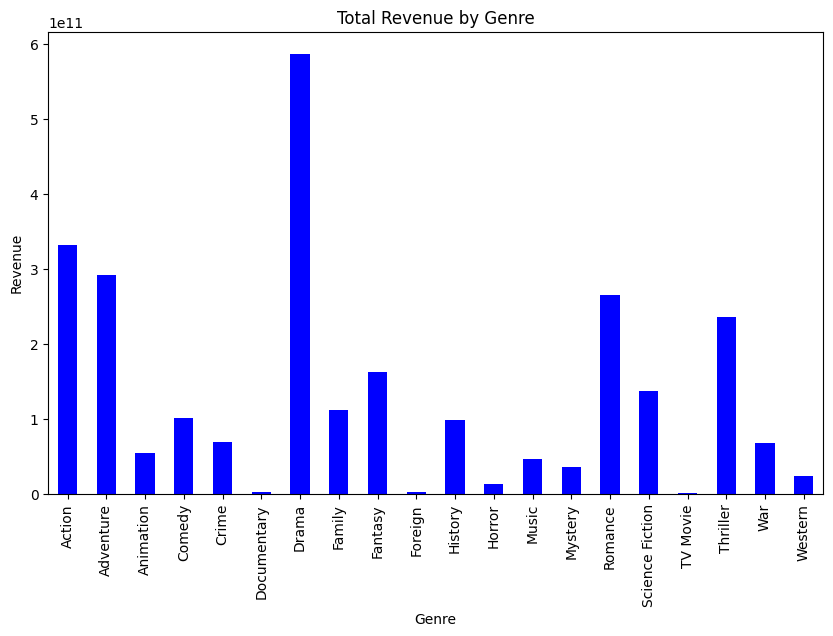

In [9]:
# Visualize the results for Revenue by Genre
plt.figure(figsize=(10, 6))
revenue_by_genre.plot(kind="bar", color="blue")
plt.xlabel("Genre")
plt.ylabel("Revenue")
plt.title("Total Revenue by Genre")
plt.show()

In [8]:
# 2. Which month(s) brings the greatest number of new movie releases? Is there a relationsip between genre 
# and release month (i.e are more action movies released in the summer)?

# Analyze the distribution of movie releases across different seasons
release_counts = all_merged['release_season'].value_counts()
most_releases_seasons = release_counts.idxmax()


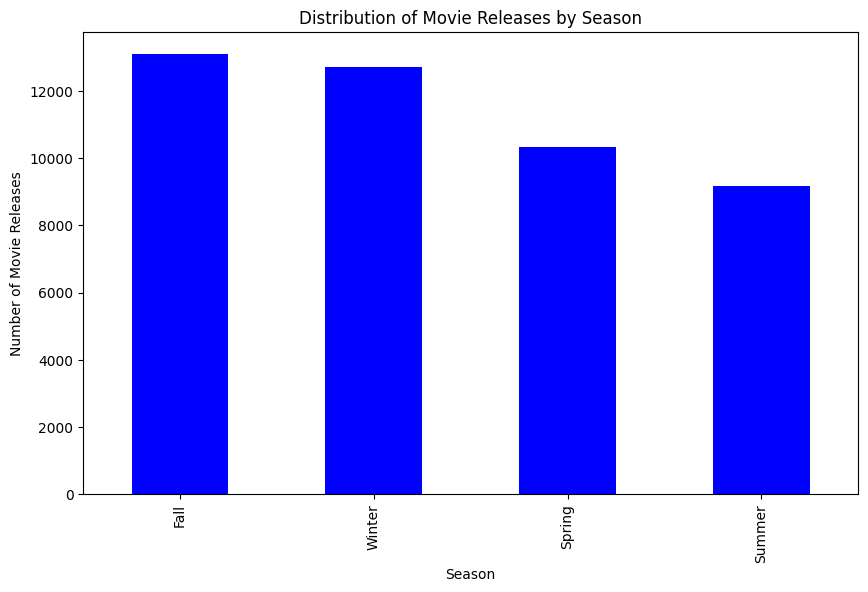

The month with the greatest number of new movie releases: Fall


In [9]:
# Visualize the results
plt.figure(figsize=(10, 6))
release_counts.plot(kind="bar", color="blue")
plt.xlabel("Season")
plt.ylabel("Number of Movie Releases")
plt.title("Distribution of Movie Releases by Season")
plt.show()

print(f"The month with the greatest number of new movie releases: {most_releases_seasons}")

In [31]:
# Perform data preprocessing
contingency_table_season = pd.crosstab(all_files['release_season'], all_files['genre_name'])
contingency_table_season

genre_name,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_season,,,,,,,,,,,,,,,,,,,,
Fall,198,175,65,153,174,30,1392,104,57,3,358,30,174,52,399,49,8,324,183,32
Spring,180,156,42,191,44,11,660,86,54,10,116,17,86,21,322,67,16,66,67,25
Summer,270,208,63,201,134,24,566,80,74,7,90,38,57,85,233,109,0,194,90,16
Winter,188,199,28,240,105,34,1107,80,149,3,208,15,140,45,390,32,7,143,143,52


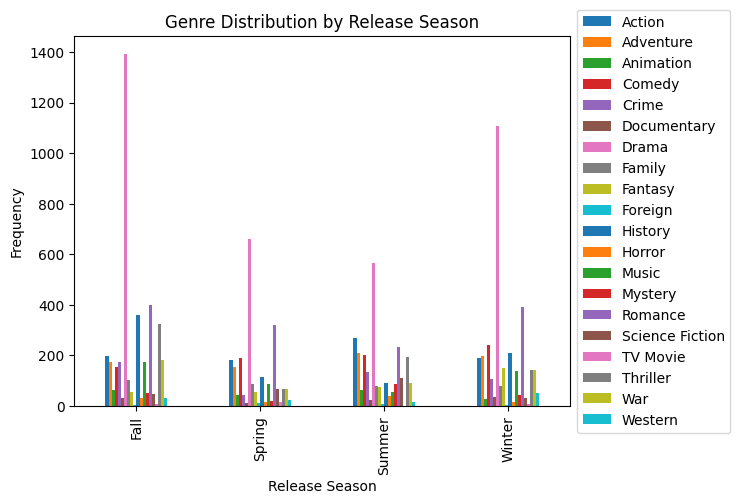

In [32]:
# Create a clustered bar plot for genres per season
#plt.figure(figsize=(80, 6))
contingency_table_season.plot(kind='bar')
# Set the plot title and labels
plt.title("Genre Distribution by Release Season")
plt.xlabel("Release Season")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [36]:
# Perform data preprocessing
contingency_table = pd.crosstab(all_files['release_date'].dt.month, all_files['genre_name'])
contingency_table.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object', name='genre_name')

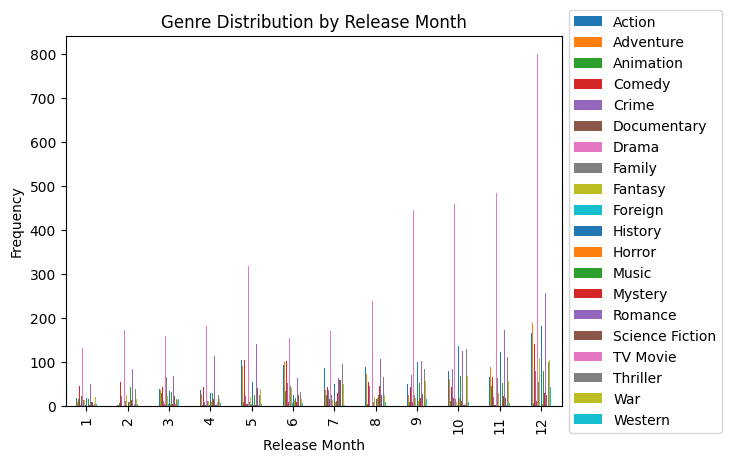

In [17]:
# Create a clustered bar plot
#plt.figure(figsize=(80, 6))
contingency_table.plot(kind='bar')
# Set the plot title and labels
plt.title("Genre Distribution by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [26]:
# Create a filtered view of the one above only showing the top 5 genres
# Sort the contingency table by the sum of releases per month
sorted_table = contingency_table.sum(axis=0).sort_values(ascending=False)

# Get the top 4 genres with the most releases
top_4_genres = sorted_table.head(5).index

# Filter the contingency table to include only the top 4 genres
filtered_table = contingency_table[top_4_genres]

# Print the filtered contingency table
print(filtered_table)

genre_name    Drama  Romance  Action  Comedy  History
release_date                                         
1               132       49      18      45       19
2               174       83       3      55        8
3               160       68      39      44       33
4               181      113      36      43       29
5               319      141     105     104       54
6               155       63      94     103       24
7               171       63      87      44       51
8               240      107      89      54       15
9               447      102      51      43       99
10              460      124      80      44      136
11              485      173      67      66      123
12              801      258     167     140      181


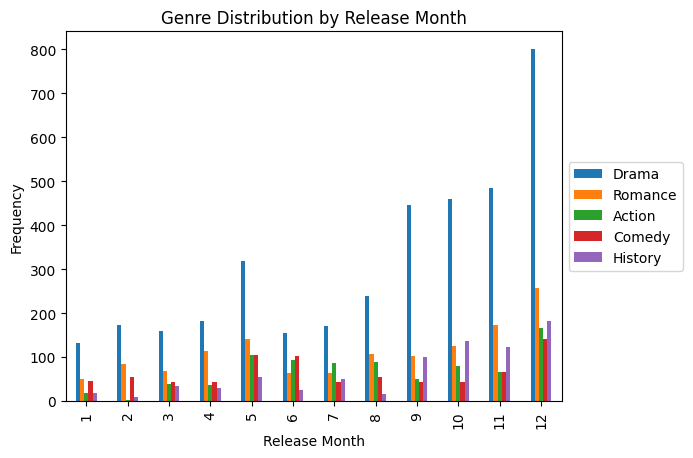

In [27]:
filtered_table.plot(kind='bar')
# Set the plot title and labels
plt.title("Genre Distribution by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [14]:
# Calculate the totals of each genre released in a month
totals = all_files.groupby(all_files['release_date'].dt.month)['genre_name'].value_counts()
totals

release_date  genre_name     
1             Drama              132
              Romance             49
              Comedy              45
              Documentary         22
              War                 21
                                ... 
12            Science Fiction     24
              Documentary         11
              Animation            6
              Horror               5
              TV Movie             1
Name: genre_name, Length: 230, dtype: int64

In [12]:
# percentage of Genres released by Month
pct_genres_by_month = all_files.groupby(all_files['release_date'].dt.month)['genre_name'].value_counts(normalize=True)
pct_genres_by_month

release_date  genre_name     
1             Drama              0.329177
              Romance            0.122195
              Comedy             0.112219
              Documentary        0.054863
              War                0.052369
                                   ...   
12            Science Fiction    0.010067
              Documentary        0.004614
              Animation          0.002517
              Horror             0.002097
              TV Movie           0.000419
Name: genre_name, Length: 230, dtype: float64

In [13]:
# Reset the index to make it accessible for plotting
pct_genres_by_month = pct_genres_by_month.reset_index(name='percentage')

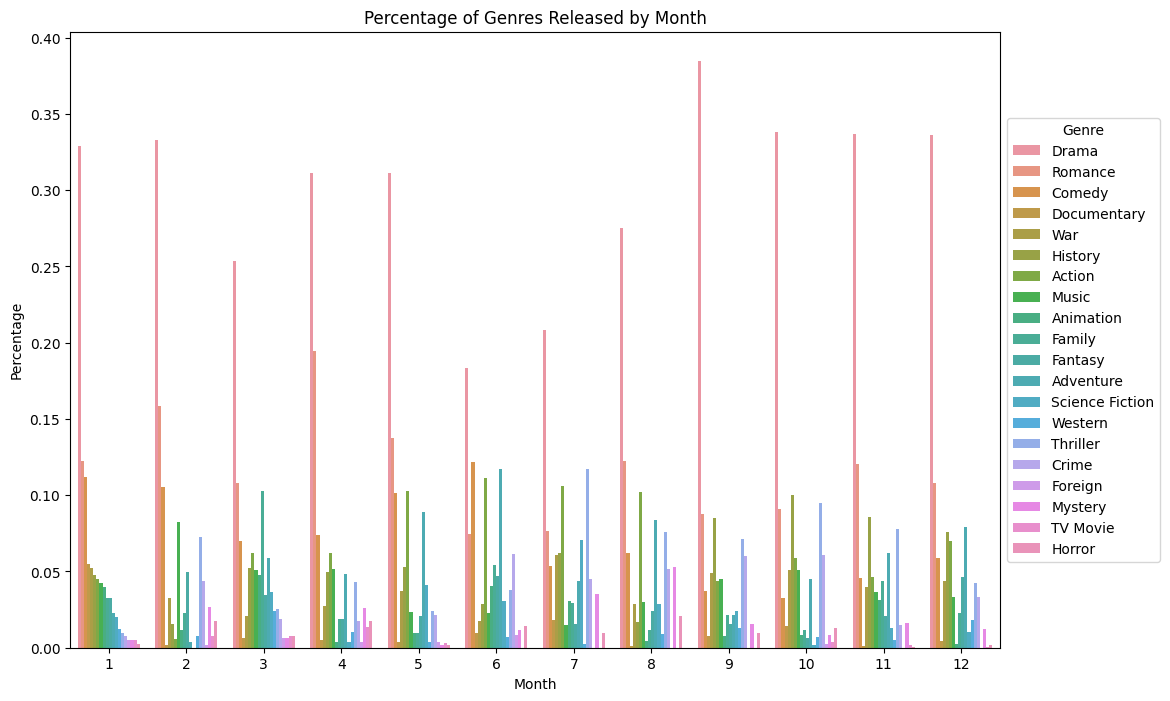

In [14]:
# Reset the index to make it accessible for plotting
pct_genres_by_month.reset_index(inplace=True)

# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='release_date', y='percentage', hue='genre_name', data=pct_genres_by_month)
plt.title('Percentage of Genres Released by Month')
plt.xlabel('Month')
plt.ylabel('Percentage')
#plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Genre', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [18]:
# Percentage of releases per month by Genre
pct_month_by_genre = pd.crosstab(all_files['genre_name'], all_files['release_date'].dt.month, normalize='index')
print(pct_month_by_genre)

release_date           1         2         3         4         5         6   \
genre_name                                                                    
Action           0.021531  0.003589  0.046651  0.043062  0.125598  0.112440   
Adventure        0.012195  0.002710  0.050136  0.037940  0.123306  0.134146   
Animation        0.080808  0.030303  0.151515  0.010101  0.050505  0.171717   
Comedy           0.057325  0.070064  0.056051  0.054777  0.132484  0.131210   
Crime            0.006565  0.050328  0.026258  0.021882  0.048140  0.113786   
Documentary      0.222222  0.010101  0.040404  0.030303  0.040404  0.080808   
Drama            0.035436  0.046711  0.042953  0.048591  0.085638  0.041611   
Family           0.037143  0.034286  0.185714  0.031429  0.028571  0.131429   
Fantasy          0.038922  0.077844  0.065868  0.032934  0.062874  0.119760   
Foreign          0.086957  0.043478  0.173913  0.086957  0.173913  0.304348   
History          0.024611  0.010363  0.042746  0.037

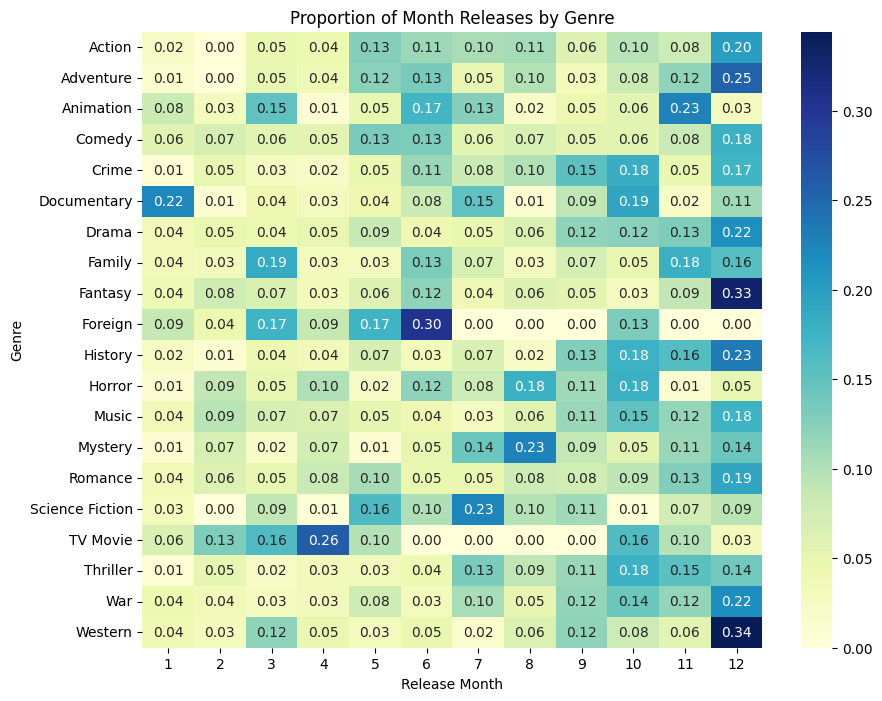

In [19]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pct_month_by_genre, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Proportion of Month Releases by Genre")
plt.xlabel("Release Month")
plt.ylabel("Genre")
plt.show()

In [20]:
# 3. Is there correlation between a movie’s production budget and award wins? If not, what other factors,
# such as release timing, the movie director, etc. contribute to award recogniLon

The correlation coefficient: 0.06350646356597359


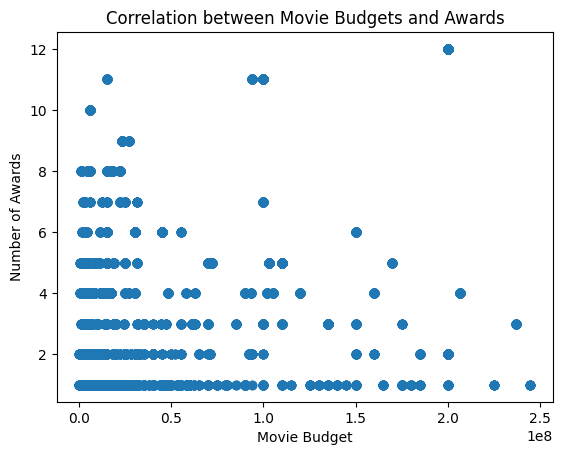

/tmp/ipykernel_158992/595886834.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(all_files.corr(), annot=True, cmap='coolwarm')


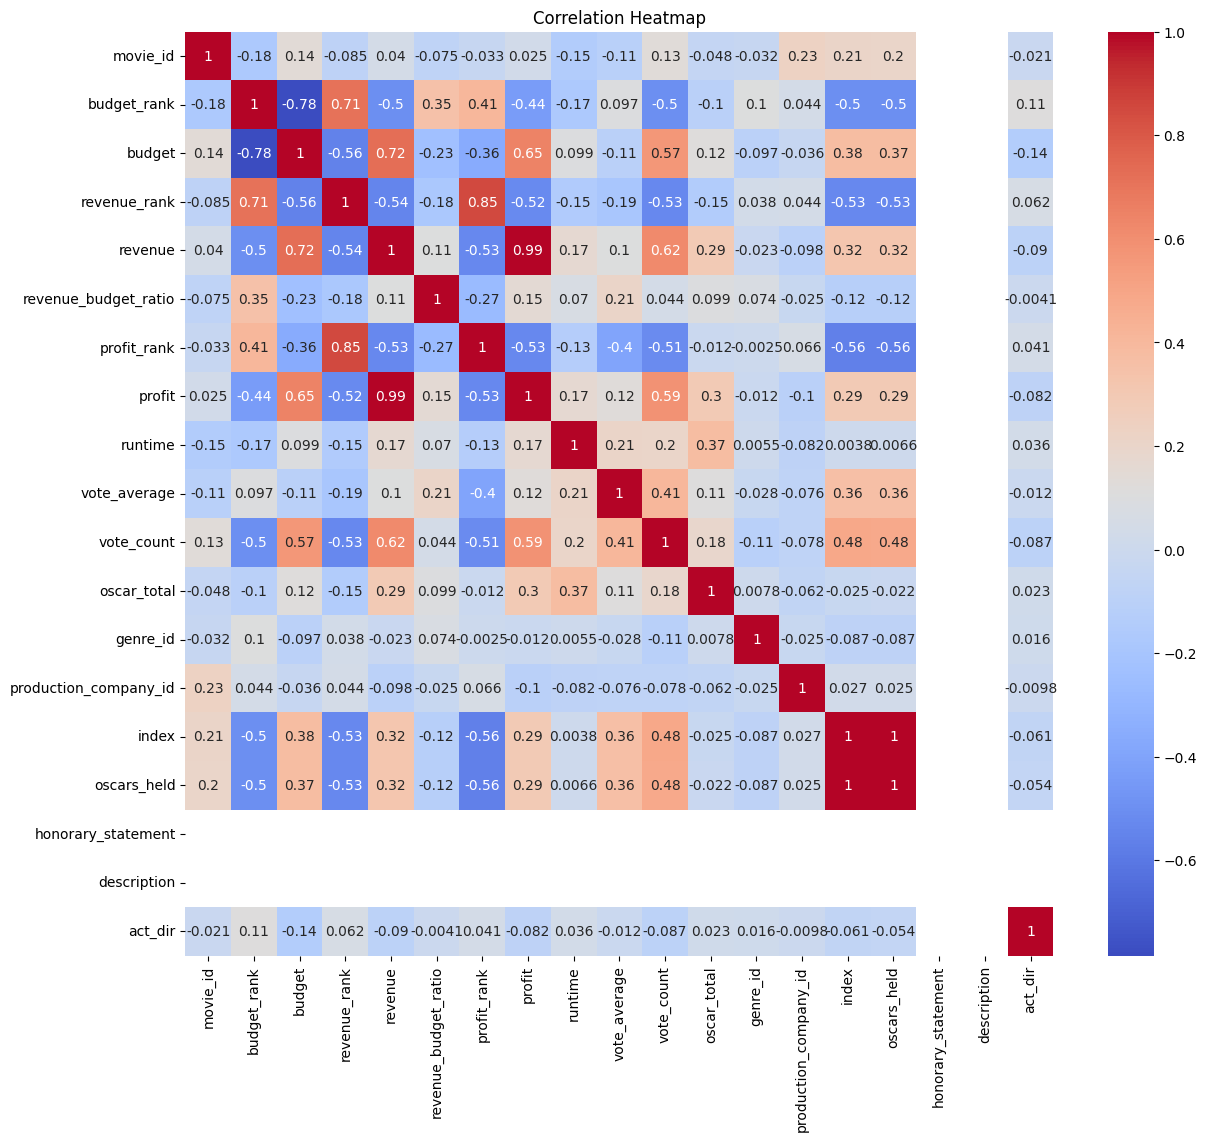

In [88]:
#Drop rows without budgets or oscar wins
all_budgets = all_merged.dropna(subset=['budget'])
all_oscars_budgets = all_budgets.dropna(subset=['oscar_total'])

# Calculate the correlation coefficient
correlation = all_oscars_budgets['budget'].corr(all_oscars_budgets['oscar_total'])
print(f"The correlation coefficient: {correlation}")

# Plot the correlation using a scatter plot
plt.scatter(all_files['budget'], all_files['oscar_total'])
plt.title('Correlation between Movie Budgets and Awards')
plt.xlabel('Movie Budget')
plt.ylabel('Number of Awards')
plt.show()

# Increase the figure size
plt.figure(figsize=(14, 12))

# Plot the correlation using a heatmap
sns.heatmap(all_files.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Additional Analysis

In [44]:
merged_list = list(all_files)
title_prod = all_files.loc[:,['title', 'production_company_name']]
title_prod = title_prod.drop_duplicates()
title_prod = title_prod.reset_index(drop=True)
title_prod

,title,production_company_name
0,"Monsters, Inc.",Pixar Animation Studios
1,"Monsters, Inc.",Walt Disney Pictures
2,Finding Nemo,Pixar Animation Studios
3,The Incredibles,Pixar Animation Studios
4,The Incredibles,Walt Disney Pictures
...,...,...
2483,The Ugly Duckling,Stayer Studio
2484,Coming Home,Les Films Hatari
2485,Cleopatra,Helen Gardner Picture Players
2486,Glass,Netherlands Government


In [45]:
# Create an empty dictionary to store the production companies and number of movies
production_movies = {}

# Iterate over the columns containing the production companies
for column in ['production_company_name']:
    # Get the production company names from the column and count their occurrences
    production_counts = title_prod[column].value_counts()
    # Update the dictionary with the production companies and their counts
    production_movies.update(production_counts)

# Create a new dataframe from the dictionary
prod_df = pd.DataFrame.from_dict(production_movies, orient='index', columns=['movies_worked_on'])

# Reset the index and rename the columns
prod_df = prod_df.reset_index().rename(columns={'index': 'production_company_name'})

prod_df

,production_company_name,movies_worked_on
0,Metro-Goldwyn-Mayer (MGM),103
1,Warner Bros.,97
2,Paramount Pictures,93
3,Twentieth Century Fox Film Corporation,88
4,Universal Pictures,53
...,...,...
1338,Orange Studios,1
1339,SofiTVCiné,1
1340,NJJ Capital,1
1341,Westart Invest,1


In [46]:
total_movies = prod_df['movies_worked_on'].sum()
prod_df['proportion'] = prod_df['movies_worked_on'] / total_movies
prod_df = prod_df.sort_values('movies_worked_on', ascending = False)
#get top 20 companies
num_companies = 20
top_companies = prod_df.head(num_companies)

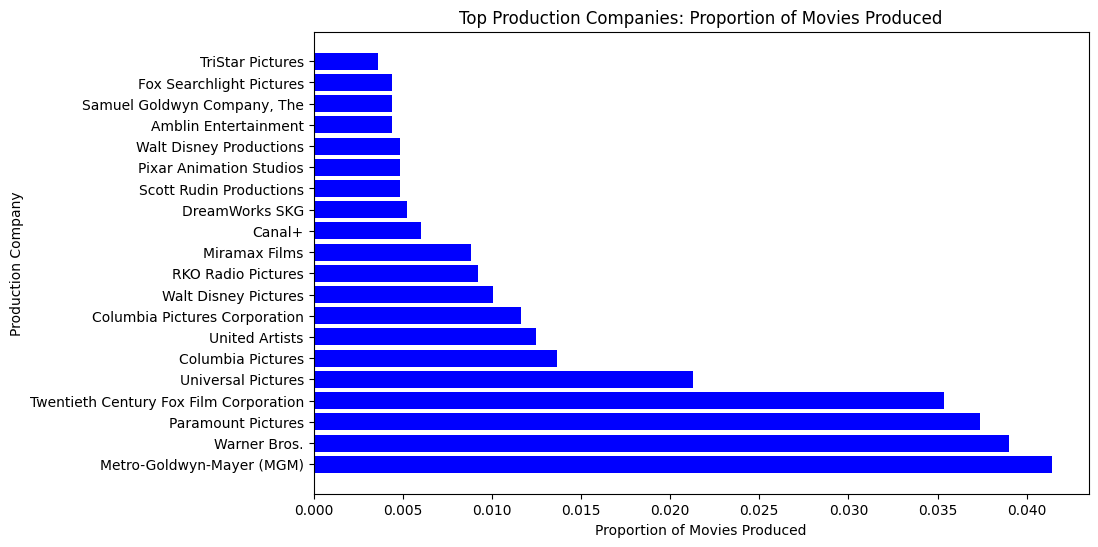

In [47]:
# Visualize the data using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_companies['production_company_name'], top_companies['proportion'], color = 'blue')
plt.xlabel('Proportion of Movies Produced')
plt.ylabel('Production Company')
plt.title('Top Production Companies: Proportion of Movies Produced')
plt.show()

In [48]:
#create list with production company and sum of oscars won
#columbia pictures is listed 2 so we are standardizing the names
all_files['production_company_name']= all_files['production_company_name'].str.replace('Columbia Pictures Corporation', 'Columbia Pictures', regex=True)
movie_and_production = all_files.drop_duplicates(['production_company_name', 'title'], keep='first')
awards_production_company = movie_and_production.groupby(['production_company_name'])['oscar_total'].sum().reset_index()

awards_production_company = awards_production_company.sort_values(by = ['oscar_total'], ascending=False)
awards_production_company
#choosing top 10 companies
#num_companies = 10
#top_companies = awards_production_company.head(num_companies)
#create proportion 
#total_oscars = top_companies['oscar_total'].sum()
#top_companies['proportion'] = top_companies['oscar_total'] / total_oscars

,production_company_name,oscar_total
1292,Warner Bros.,212.0
1227,Twentieth Century Fox Film Corporation,186.0
889,Paramount Pictures,184.0
764,Metro-Goldwyn-Mayer (MGM),174.0
267,Columbia Pictures,143.0
...,...,...
626,Kingsmere Productions Ltd.,1.0
627,KippSter Entertainment,1.0
629,Komplizen Film,1.0
630,Konrad Pictures,1.0


In [49]:
#choosing top 10 companies
num_companies = 10
top_companies_awards = awards_production_company.head(num_companies)
print(top_companies_awards)


                     production_company_name  oscar_total
1292                            Warner Bros.        212.0
1227  Twentieth Century Fox Film Corporation        186.0
889                       Paramount Pictures        184.0
764                Metro-Goldwyn-Mayer (MGM)        174.0
267                        Columbia Pictures        143.0
1251                      Universal Pictures        117.0
1243                          United Artists         82.0
779                            Miramax Films         59.0
958                       RKO Radio Pictures         35.0
1284                    Walt Disney Pictures         34.0


<Figure size 1000x600 with 0 Axes>

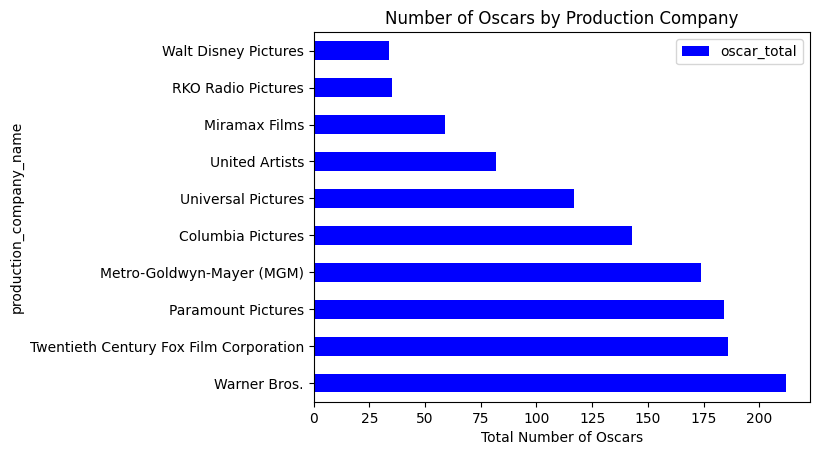

In [51]:
# Visualize the results
plt.figure(figsize=(10, 6))
top_companies_awards.plot(kind="barh", color="blue", x='production_company_name')
plt.xlabel("Total Number of Oscars")
plt.title("Number of Oscars by Production Company")
plt.show()